In [800]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [801]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [803]:
# missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### Add new column 'Region' to distinguish between Bejaia and Sidi-Bel Abbes Regions

In [804]:
df.loc[:122,"Region"] = 0   # Bejaia Region
df.loc[122:,"Region"] = 1   # Sidi-Bel Abbes Region 
df[['Region']] = df[['Region']].astype(int)

In [805]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [806]:
# Remove the null values
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [807]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [808]:
# Removing the Region separator row
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [809]:
#strip column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [810]:
df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [811]:
# objects = [feature for feature in df.columns if df[feature].dtypes == 'O']
# for feature in objects:
    # if feature != 'Classes':
        # df[feature] = df[feature].astype(float)

In [812]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [813]:
for feature in df.columns:
    if df[feature].dtypes == 'O' and feature != 'Classes':
        df[feature] = df[feature].astype(float)
    if feature == 'Classes':
        df[feature] = df[feature].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [814]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


### Save the cleaned data in a csv

In [815]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv')

# Exploratory Data Analysis

<Axes: >

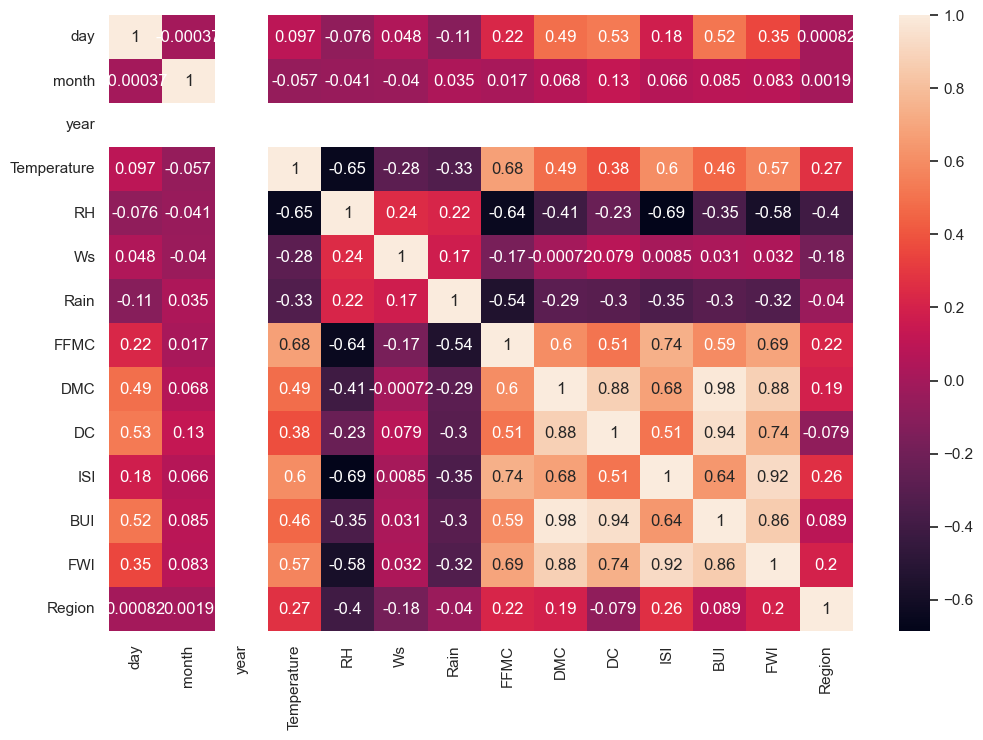

In [816]:
df_copy = df.drop(['Classes'], axis = 1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(), annot = True)

In [817]:
df_copy = df.drop(['day','month','year'], axis = 1)     #Dropping columns that have low correlation with Temperature

In [818]:
df_copy['Classes'].value_counts()   #Checking for extra spaces

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [819]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains("not fire"), 0, 1)  
df_copy.head() 

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


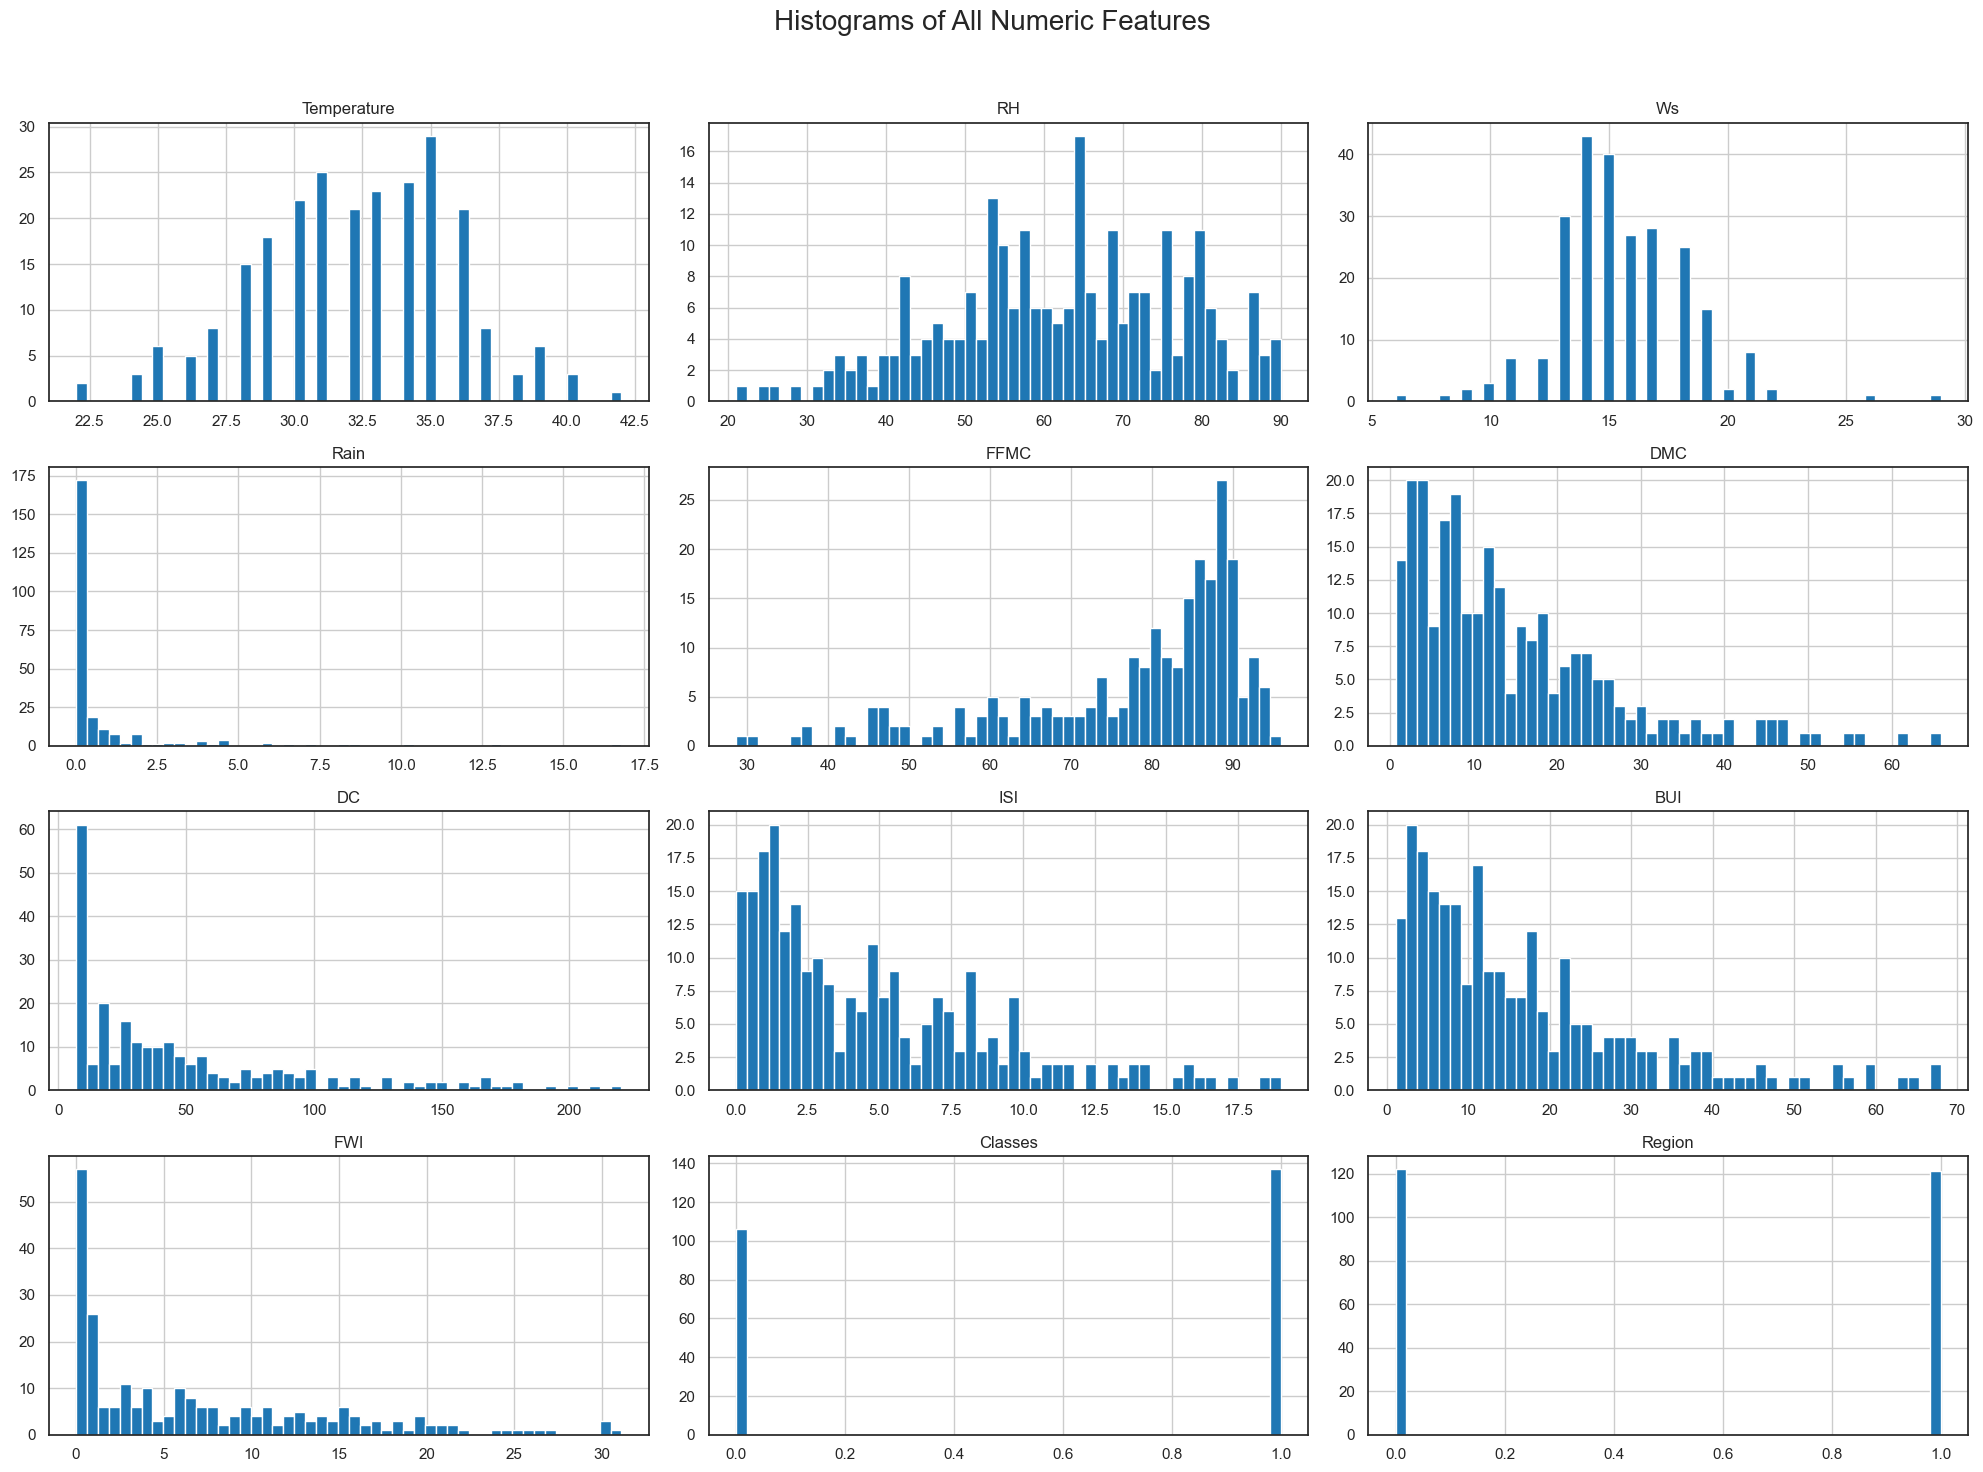

In [820]:
df_copy.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of All Numeric Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  #rect = [left-edge, bottom-edge, right-edge, top-edge]
plt.show()


Text(0.5, 1.0, 'Pie Chart of Classes')

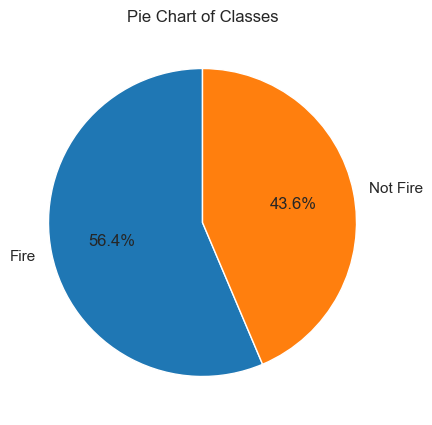

In [821]:
percentage = df_copy['Classes'].value_counts(normalize = True) * 100
classLabels = ["Fire", "Not Fire"]
plt.figure(figsize = (5, 5))
plt.pie(percentage, labels = classLabels, autopct = '%1.1f%%', startangle = 90)
plt.title("Pie Chart of Classes")

## Correlation

<Axes: >

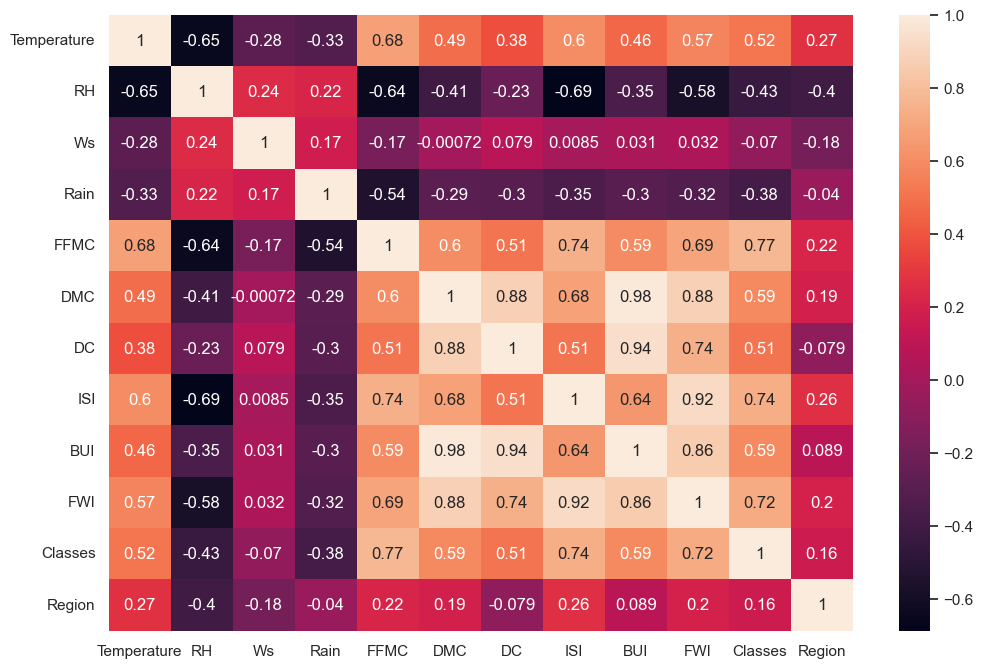

In [822]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(), annot = True)

## Monthly Fire Analysis

Text(0, 0.5, 'Number of Fires')

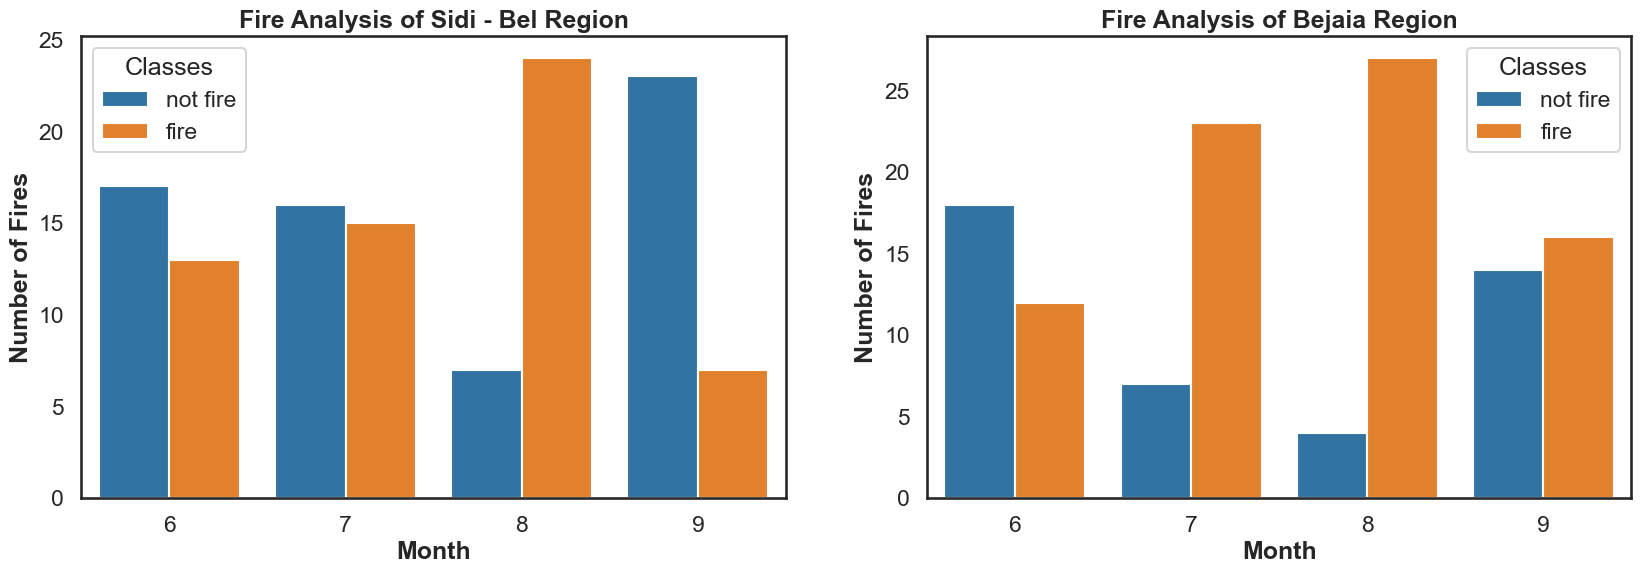

In [823]:
df['Classes'] = df['Classes'].str.strip()
bejaia = df.loc[df['Region'] == 0]
sidi = df.loc[df['Region'] == 1]
sns.set_context("talk")      # Font and element scaline. options: 'notebook', 'paper', 'talk', 'poster'
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # One row, two plots
sns.countplot(x='month', hue='Classes', data=bejaia, ax=axes[0])
axes[0].set_title("Fire Analysis of Sidi - Bel Region", weight='bold')
axes[0].set_xlabel("Month", weight='bold')
axes[0].set_ylabel("Number of Fires", weight='bold')

sns.countplot(x='month', hue='Classes', data=sidi, ax=axes[1])
axes[1].set_title("Fire Analysis of Bejaia Region", weight='bold')
axes[1].set_xlabel("Month", weight='bold')
axes[1].set_ylabel("Number of Fires", weight='bold')

## Observations
Most fires occured in August

# Linear Regression

Dependent feature : FWI<br>
Independent features : Everything else

In [824]:
X = df_copy.drop('FWI', axis = 1)
y = df_copy['FWI']

In [825]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<Axes: >

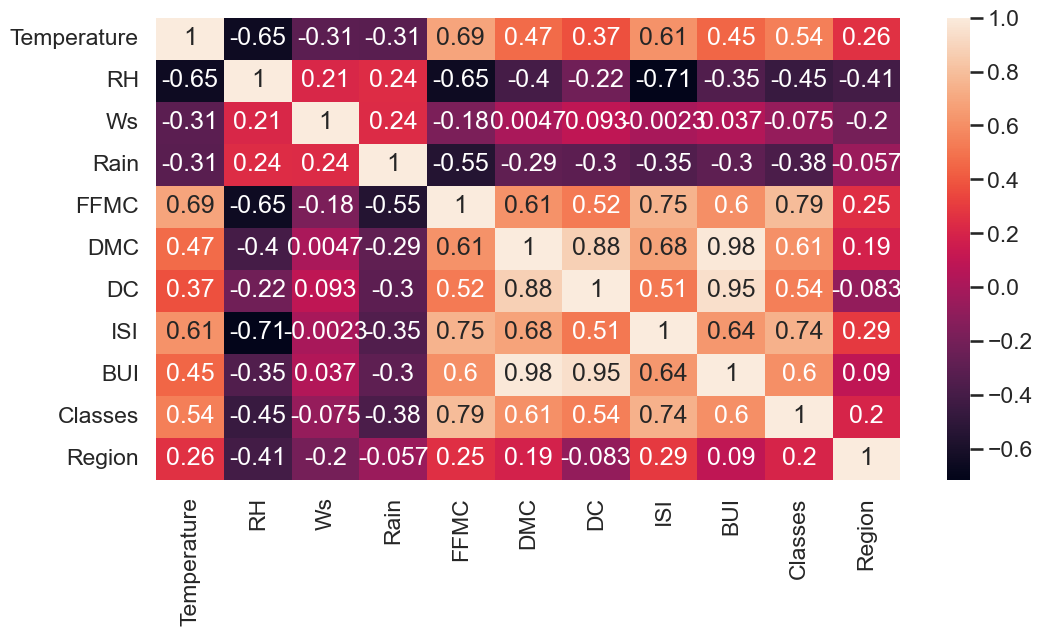

In [826]:
plt.subplots(figsize = (12,6))
sns.heatmap(X_train.corr(), annot = True)

### Removing multicollinearity
If there are two features that are highly correlated then we can exclude one from the model

In [827]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [828]:
corr_features = correlation(X_train, 0.85)      #Threshold is decided by domain expert
corr_features

{'BUI', 'DC'}

In [829]:
X = X.drop(corr_features, axis = 1)
X.shape

(243, 9)

### Feature Scaling or Standardization

In [830]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [831]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Boxplots to understand the effects of Standard Scaler

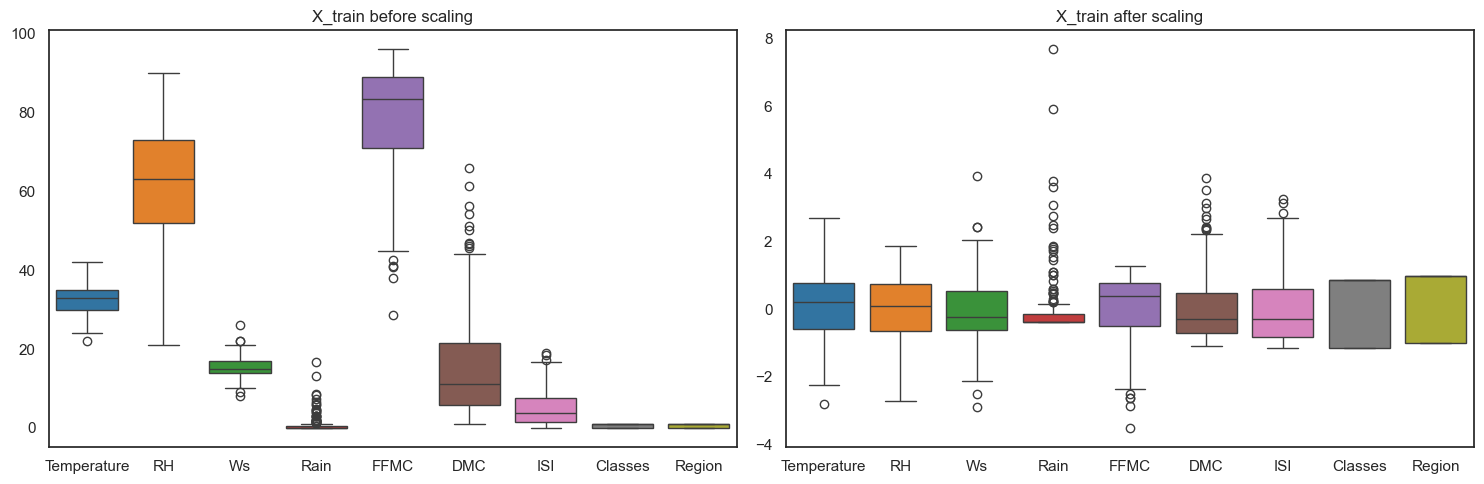

In [832]:
sns.set_context('notebook')
sns.set_style('white')
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")

plt.subplot(1, 2, 2)
sns.boxplot(data = pd.DataFrame(X_train_scaled, columns = X_train.columns))
plt.title("X_train after scaling")
plt.tight_layout()

# Linear Regression Model

In [833]:
from sklearn.linear_model import LinearRegression
linearregressor = LinearRegression()
linearregressor.fit(X_train_scaled, y_train)
y_pred = linearregressor.predict(X_test_scaled)

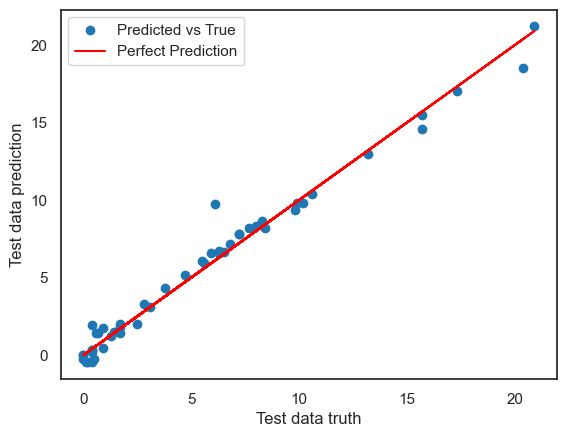

In [834]:
plt.scatter(y_test, y_pred, label="Predicted vs True")
plt.xlabel("Test data truth")
plt.ylabel("Test data prediction")
plt.plot(y_test, y_test, 'r', label = "Perfect Prediction")   # 100% accuracy line
plt.legend()

## Performance Metrics

In [835]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
ar2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)
print("MAPE:",mape,"%")
print("R2 score:",r2)
print("Adjusted R2 score:", ar2)

MSE: 0.5882990110708648
RMSE: 0.7670065260940514
MAE: 0.5049978694165663
MAPE: 2687967217737256.5 %
R2 score: 0.9805895859259883
Adjusted R2 score: 0.9761102596012164


MAPE is ridiculously high due to there being a y_test value of 0 which is used in the denominator of the MAPE calculation

In [836]:
print((y_test == 0).sum())

3


In [837]:
non_zero_index = y_test !=0
mape = mean_absolute_percentage_error(y_test[non_zero_index], y_pred[non_zero_index]) * 100
print("MAPE:",mape,"%")

MAPE: 51.82490721552065 %


MAPE is still high due to the impact of smaller values of y_test and y_pred

In [838]:
non_zero_index = y_test > 1
mape = mean_absolute_percentage_error(y_test[non_zero_index], y_pred[non_zero_index]) * 100
print("MAPE:",mape,"%")

MAPE: 8.501238812011499 %


In [839]:
dfs = pd.DataFrame(non_zero_index)
dfs.value_counts()

FWI  
True     34
False    15
Name: count, dtype: int64

# Lasso Regression

In [840]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

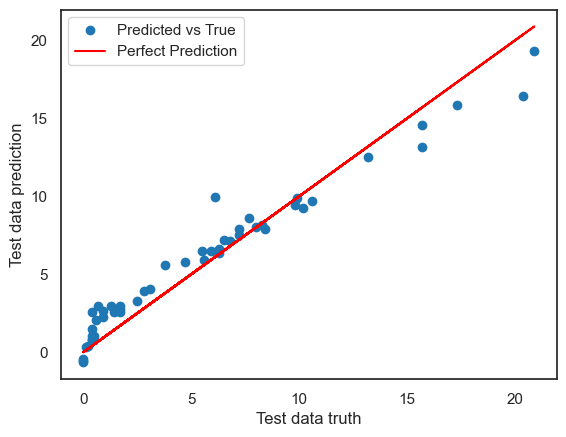

In [841]:
plt.scatter(y_test, y_pred, label="Predicted vs True")
plt.xlabel("Test data truth")
plt.ylabel("Test data prediction")
plt.plot(y_test, y_test, 'r', label = "Perfect Prediction")   # 100% accuracy line
plt.legend()

In [842]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
ar2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)
print("MAPE:",mape,"%")
print("R2 score:",r2)
print("Adjusted R2 score:", ar2)

MSE: 1.726042325023142
RMSE: 1.31378930008702
MAE: 1.0093958923873407
MAPE: 1.5177735604930462e+16 %
R2 score: 0.9430507350726562
Adjusted R2 score: 0.9299085970125


# Lasso with Cross Validation

In [843]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)

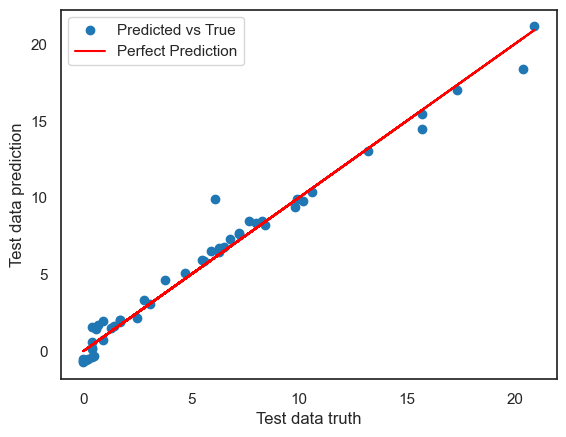

In [844]:
plt.scatter(y_test, y_pred, label="Predicted vs True")
plt.xlabel("Test data truth")
plt.ylabel("Test data prediction")
plt.plot(y_test, y_test, 'r', label = "Perfect Prediction")   # 100% accuracy line
plt.legend()

In [845]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
ar2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)
print("MAPE:",mape,"%")
print("R2 score:",r2)
print("Adjusted R2 score:", ar2)

MSE: 0.6568370026125329
RMSE: 0.8104548121965425
MAE: 0.5556715031617872
MAPE: 1.7405769835201382e+16 %
R2 score: 0.978328234520343
Adjusted R2 score: 0.9733270578711914


# Ridge Regression

In [846]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

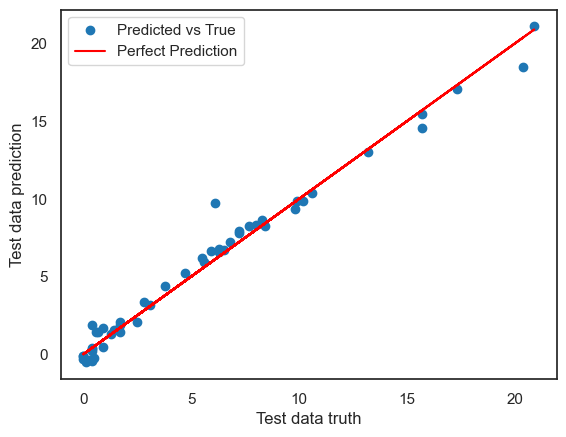

In [847]:
plt.scatter(y_test, y_pred, label="Predicted vs True")
plt.xlabel("Test data truth")
plt.ylabel("Test data prediction")
plt.plot(y_test, y_test, 'r', label = "Perfect Prediction")   # 100% accuracy line
plt.legend()

In [848]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
ar2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)
print("MAPE:",mape,"%")
print("R2 score:",r2)
print("Adjusted R2 score:", ar2)

MSE: 0.6029616070548557
RMSE: 0.7765060251246321
MAE: 0.5192048325844728
MAPE: 5245534513194849.0 %
R2 score: 0.9801058063273602
Adjusted R2 score: 0.975514838556751


# Ridge Regression with Cross Validation

In [849]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)

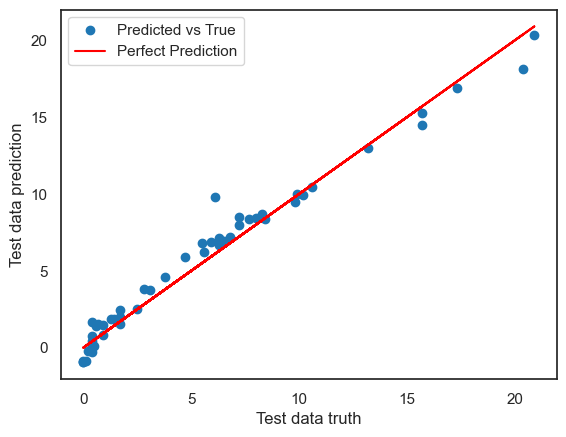

In [850]:
plt.scatter(y_test, y_pred, label="Predicted vs True")
plt.xlabel("Test data truth")
plt.ylabel("Test data prediction")
plt.plot(y_test, y_test, 'r', label = "Perfect Prediction")   # 100% accuracy line
plt.legend()

In [851]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
ar2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)
print("MAPE:",mape,"%")
print("R2 score:",r2)
print("Adjusted R2 score:", ar2)

MSE: 0.8419867979327424
RMSE: 0.9175983859689065
MAE: 0.68692620082771
MAPE: 2.5205880788726096e+16 %
R2 score: 0.9722193780965628
Adjusted R2 score: 0.9658084653496157


In [852]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Elastic net Regression

In [853]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)

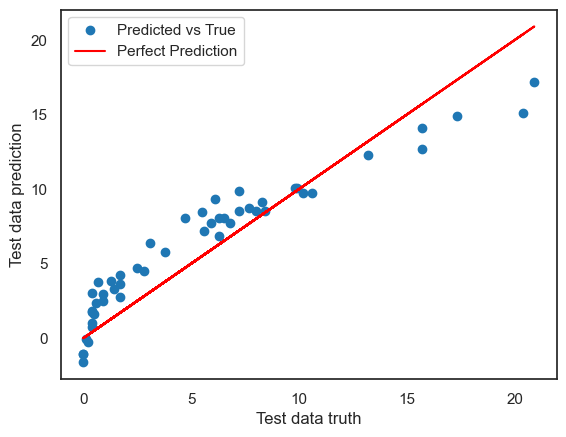

In [854]:
plt.scatter(y_test, y_pred, label="Predicted vs True")
plt.xlabel("Test data truth")
plt.ylabel("Test data prediction")
plt.plot(y_test, y_test, 'r', label = "Perfect Prediction")   # 100% accuracy line
plt.legend()

In [855]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
ar2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)
print("MAPE:",mape,"%")
print("R2 score:",r2)
print("Adjusted R2 score:", ar2)

MSE: 4.009921298441002
RMSE: 2.0024787885121285
MAE: 1.6834416340136709
MAPE: 3.4655881734699476e+16 %
R2 score: 0.8676961352267807
Adjusted R2 score: 0.8371644741252685


# Elastic Net CV

In [856]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV()
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)

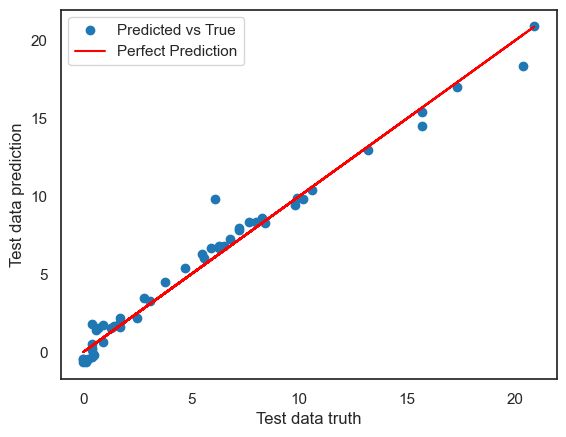

In [857]:
plt.scatter(y_test, y_pred, label="Predicted vs True")
plt.xlabel("Test data truth")
plt.ylabel("Test data prediction")
plt.plot(y_test, y_test, 'r', label = "Perfect Prediction")   # 100% accuracy line
plt.legend()

In [858]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
ar2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)
print("MAPE:",mape,"%")
print("R2 score:",r2)
print("Adjusted R2 score:", ar2)

MSE: 0.6637102658943733
RMSE: 0.8146841510023215
MAE: 0.5710147088777218
MAPE: 1.4024360893024502e+16 %
R2 score: 0.9781014571778188
Adjusted R2 score: 0.973047947295777


# Pickling

In [859]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [860]:
from sklearn.linear_model import LinearRegression
linearregressor = LinearRegression()
linearregressor.fit(X_train_scaled, y_train)

LinearRegression()

In [861]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(linearregressor, open('LinReg.pkl', 'wb'))